In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
census_data = {
     "age" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks102ew.xls",
     "education" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks501ew.xls",
     "economic" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks601ew.xls",
}

In [54]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv", usecols=["Area_Code", "Remain", "Leave"] )

In [55]:
df.columns
len(df)

382

In [56]:
df.head(2)

,Area_Code,Remain,Leave
0,E06000031,34176,53216
1,E06000032,36708,47773


In [57]:
any(df.Area_Code == "E06000032")

True

In [58]:
edu = pd.read_excel(io=census_data["education"], sheetname="KS501EW_Numbers", header=10, parse_cols=("A,G,K"), skiprows=[11,12,13])
edu.dropna(how='all', inplace=True)
edu.rename(index=str, inplace=True, columns={
        "Area code": "Area_Code", 
        "Highest level of qualification: Level 4 qualifications and above": "High_edu",
        "Highest level of qualification: Level 1 qualifications": "Low_edu",
    })
len(edu)

396

In [59]:
edu.head(2)

,Area_Code,Low_edu,High_edu
1,K04000001,6047384.0,12383477.0
3,E92000001,5714441.0,11769361.0


In [60]:
res = pd.merge(df, edu, on='Area_Code')

In [61]:
len(res)

342

In [62]:
res.head()

,Area_Code,Remain,Leave,Low_edu,High_edu
0,E06000031,34176,53216,22288.0,29245.0
1,E06000032,36708,47773,22813.0,34814.0
2,E06000033,39348,54522,23075.0,30691.0
3,E06000034,22151,57765,22396.0,21519.0
4,E06000055,41497,44569,17313.0,35417.0


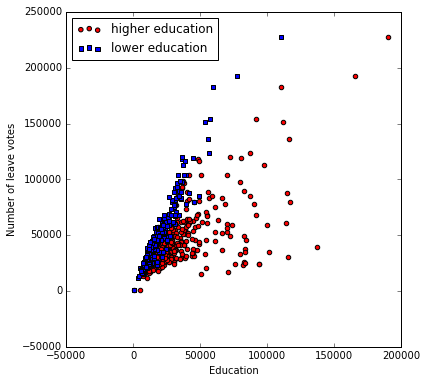

In [63]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

# could also take res.Remain ...
ax.scatter(res.High_edu, res.Leave, s=20, c='r', marker="o", label='higher education')
ax.scatter(res.Low_edu, res.Leave, s=20, c='b', marker="s", label='lower education')

plt.legend(loc='upper left');
plt.xlabel('Education')
plt.ylabel('Number of leave votes')
plt.show()

#fig.savefig("brexit_vote_with_census_table.png")

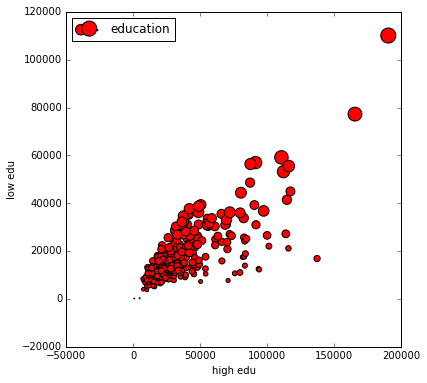

In [70]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

# could also take res.Remain ...
ax.scatter(res.High_edu, res.Low_edu, s=res.Leave/1000, c='r', marker="o", label='education')
#ax.scatter(res.Low_edu, res.Leave, s=20, c='b', marker="s", label='lower education')

plt.legend(loc='upper left');
plt.xlabel('high edu')
plt.ylabel('low edu')
plt.show()

#fig.savefig("brexit_vote_with_census_table.png")

In [35]:
age = pd.read_excel(io=census_data["age"], sheetname="KS102EW_Numbers", header=10, parse_cols=("A,F:U"), skiprows=[11,12,13])
age.dropna(how='all', inplace=True)
age.rename(index=str, inplace=True, columns={"Area code": "Area_Code", })
age["younger"] = age.iloc[:, 1:11].sum(axis=1) # 0-44 years
age["older"] = age.iloc[:, 11:17].sum(axis=1) # 45->90 years

In [36]:
len(age)

396

In [37]:
age_y_o = age[["Area_Code", "younger", "older"]]
age_y_o.head(2)

,Area_Code,younger,older
0,K04000001,32589542.0,23486370.0
2,E92000001,30902748.0,22109708.0


In [38]:
res = pd.merge(df, age_y_o, on='Area_Code')

In [39]:
len(res)

342

In [40]:
res.head()

,Area_Code,Remain,Leave,younger,older
0,E06000031,34176,53216,116038.0,67593.0
1,E06000032,36708,47773,136944.0,66257.0
2,E06000033,39348,54522,99132.0,74526.0
3,E06000034,22151,57765,99570.0,58135.0
4,E06000055,41497,44569,92492.0,64987.0


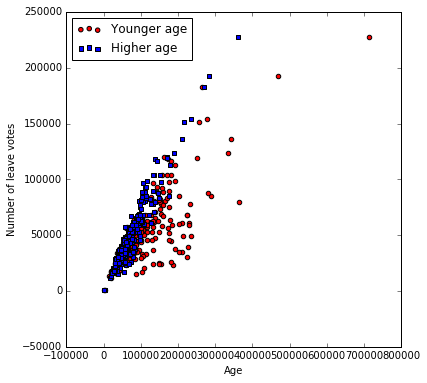

In [44]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

# could also take res.Remain ...
ax.scatter(res.younger, res.Leave, s=20, c='r', marker="o", label='Younger age')
ax.scatter(res.older, res.Leave, s=20, c='b', marker="s", label='Higher age')

plt.legend(loc='upper left');
plt.xlabel('Age')
plt.ylabel('Number of leave votes')
plt.show()